In [168]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import os
from patchify import patchify
import random
from scipy import ndimage
import cv2

In [169]:
os.getcwd()

'c:\\Users\\dhruv\\Documents\\DA-IICT\\Arpit_rana\\SAM_Model\\Codes\\Notebook'

In [170]:
target_images = os.getcwd() + "\\images_1024\\images"
target_masks = os.getcwd() + "\\images_1024\\masks"
target_images

'c:\\Users\\dhruv\\Documents\\DA-IICT\\Arpit_rana\\SAM_Model\\Codes\\Notebook\\images_1024\\images'

In [171]:
images = []

for i in range(len(os.listdir(target_images))):
    img_path = target_images+"\\"+os.listdir(target_images)[i]
    img = cv2.imread(img_path)
    images.append(img)
images

[array([[[124, 128, 122],
         [122, 126, 120],
         [124, 125, 121],
         ...,
         [ 64,  66,  66],
         [ 68,  73,  72],
         [ 97, 102, 101]],
 
        [[122, 126, 120],
         [131, 135, 129],
         [124, 125, 121],
         ...,
         [ 55,  57,  57],
         [ 80,  85,  84],
         [ 80,  85,  84]],
 
        [[126, 130, 125],
         [121, 125, 120],
         [123, 127, 122],
         ...,
         [ 96,  98,  98],
         [ 79,  81,  81],
         [ 60,  62,  62]],
 
        ...,
 
        [[ 45,  50,  49],
         [ 81,  86,  85],
         [ 97,  99,  99],
         ...,
         [115, 118, 103],
         [104, 107,  92],
         [105, 108,  93]],
 
        [[ 25,  28,  26],
         [134, 137, 135],
         [128, 131, 129],
         ...,
         [ 95,  98,  83],
         [108, 113,  98],
         [109, 114,  99]],
 
        [[ 40,  43,  41],
         [110, 113, 111],
         [123, 126, 124],
         ...,
         [118, 121, 106],
  

In [172]:
masks = []

for i in range(len(os.listdir(target_masks))):
    img_path = target_masks+"\\"+os.listdir(target_masks)[i]
    img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    masks.append(img)
masks

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[  1,   0,   0, ..., 251, 255, 255],
        [  0,   1,   0, ..., 255, 255, 254],
        [  0,   0,   0, ..., 254, 255, 254],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0

In [173]:
images = np.array(images)
images.shape

(16, 1024, 1024, 3)

In [174]:
masks = np.array(masks)
masks.shape

(16, 1024, 1024)

In [176]:
## valid images (images which has rooftop)
valid_indices = [i for i, masks in enumerate(masks) if masks.max()!=0]

filtered_images = images[valid_indices]
filtered_masks = masks[valid_indices]

In [177]:
from datasets import Dataset
from PIL import Image

In [178]:
dataset_dict = {
    "image" : [Image.fromarray(img) for img in filtered_images],
    "label" : [Image.fromarray(m) for m in filtered_masks]
}


dataset = Dataset.from_dict(dataset_dict)
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 16
})

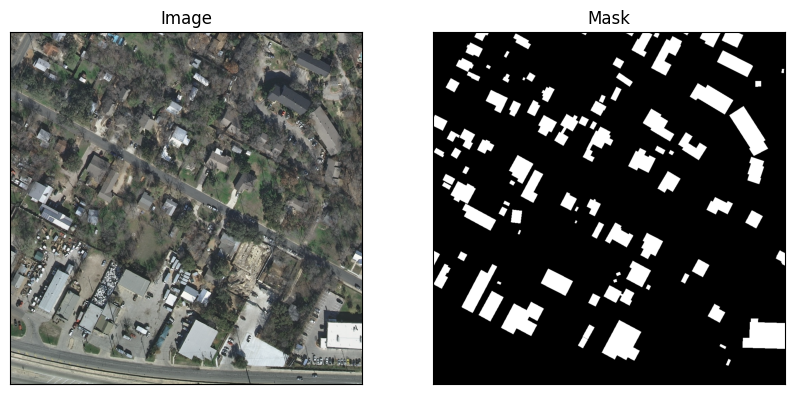

In [179]:
rand_num = random.randint(0, filtered_images.shape[0]-1)
example_images = dataset[rand_num]["image"]
example_mask = dataset[rand_num]["label"]

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].imshow(np.array(example_images), cmap="gray")
ax[0].set_title("Image")

ax[1].imshow(example_mask, cmap="gray")
ax[1].set_title("Mask")

for a in ax:
    a.set_xticks([])
    a.set_yticks([])
    a.set_xticklabels([])
    a.set_yticklabels([])

plt.show()

In [180]:
from torch.utils.data import Dataset, DataLoader

In [181]:
import PIL

In [182]:
class SAMDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        print("start")
        item = self.dataset[idx]
        print(item)
        image = np.asarray(item["image"])
        image = torch.tensor(image)
        # print(image)
        ground_truth_mask = np.asarray(item["label"])
        ground_truth_mask = torch.tensor(ground_truth_mask)
        # print(ground_truth_mask)
        
        return image, ground_truth_mask

In [183]:
tr_data = SAMDataset(dataset)
tr_data

In [184]:
tr_loader = DataLoader(tr_data)
tr_loader

In [185]:
for im, ma in iter(tr_loader):
    print(im.shape)
    print(ma.shape)

start
{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024 at 0x18E0E6AD780>, 'label': <PIL.PngImagePlugin.PngImageFile image mode=L size=1024x1024 at 0x18E0E6ADE40>}
torch.Size([1, 1024, 1024, 3])
torch.Size([1, 1024, 1024])
start
{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024 at 0x18E0E6ADAB0>, 'label': <PIL.PngImagePlugin.PngImageFile image mode=L size=1024x1024 at 0x18E0E6AD750>}
torch.Size([1, 1024, 1024, 3])
torch.Size([1, 1024, 1024])
start
{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024 at 0x18E0E6ACD60>, 'label': <PIL.PngImagePlugin.PngImageFile image mode=L size=1024x1024 at 0x18E0E6AE6B0>}
torch.Size([1, 1024, 1024, 3])
torch.Size([1, 1024, 1024])
start
{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024 at 0x18E0E6ADAE0>, 'label': <PIL.PngImagePlugin.PngImageFile image mode=L size=1024x1024 at 0x18E0E6ADF00>}
torch.Size([1, 1024, 1024, 3])
torch.Size([1, 1024, 1024])
start
{'image': 

In [186]:
from segment_anything import sam_model_registry

In [187]:
sam = sam_model_registry["vit_b"]("C:\\Users\\dhruv\\Documents\\DA-IICT\\Arpit_rana\\SAM_Model\\Codes\\Notebook\\original_Model\\sam_vit_b_01ec64.pth")

c:\Users\dhruv\Python_Envs\dl_env\lib\site-packages\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [188]:
sam

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()
    )


In [189]:
# Freeze image encoder
for param in sam.image_encoder.parameters():
    param.requires_grad = False

In [190]:
# Set mask decoder to training mode
sam.mask_decoder.train()

MaskDecoder(
  (transformer): TwoWayTransformer(
    (layers): ModuleList(
      (0-1): 2 x TwoWayAttentionBlock(
        (self_attn): Attention(
          (q_proj): Linear(in_features=256, out_features=256, bias=True)
          (k_proj): Linear(in_features=256, out_features=256, bias=True)
          (v_proj): Linear(in_features=256, out_features=256, bias=True)
          (out_proj): Linear(in_features=256, out_features=256, bias=True)
        )
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (cross_attn_token_to_image): Attention(
          (q_proj): Linear(in_features=256, out_features=128, bias=True)
          (k_proj): Linear(in_features=256, out_features=128, bias=True)
          (v_proj): Linear(in_features=256, out_features=128, bias=True)
          (out_proj): Linear(in_features=128, out_features=256, bias=True)
        )
        (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_fea

In [191]:
import torch
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm

In [192]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(sam.mask_decoder.parameters())

In [193]:
num_epochs = 2

In [195]:
for epoch in range(num_epochs):
    sam.train()
    running_loss = 0.0
    for images, masks in tqdm(tr_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images = torch.tensor(images).to(dtype=torch.float32)
        images = images.permute((0,3,2,1))
        masks = masks.to(dtype=torch.long)
        print(f"{images.shape}")
        print(f"{masks.shape}")
        # Forward pass
        with torch.no_grad():
            image_embeddings = sam.image_encoder(images)

        sparse_embeddings = torch.empty((images.size(0), 0, image_embeddings.size(-1)))
        dense_embeddings = torch.empty((images.size(0), 256, image_embeddings.size(-1)))

        outputs = sam.mask_decoder(
            image_embeddings=image_embeddings,
            sparse_prompt_embeddings=sparse_embeddings,
            dense_prompt_embeddings=dense_embeddings,
        )
        print("getting output.")
        print(outputs.shape)
        print(masks)

        # Compute loss
        loss = criterion(outputs, masks)
        running_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")


Epoch 1/2:   0%|          | 0/16 [00:00<?, ?it/s]C:\Users\dhruv\AppData\Local\Temp\ipykernel_1160\4173347941.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(images).to(dtype=torch.float32)


start
{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024 at 0x18E0D0BE2C0>, 'label': <PIL.PngImagePlugin.PngImageFile image mode=L size=1024x1024 at 0x18E0D0BC4F0>}
torch.Size([1, 3, 1024, 1024])
torch.Size([1, 1024, 1024])


Epoch 1/2:   0%|          | 0/16 [00:10<?, ?it/s]


TypeError: MaskDecoder.forward() missing 2 required positional arguments: 'image_pe' and 'multimask_output'

## try other way 

In [196]:
import os 
os.getcwd()

'c:\\Users\\dhruv\\Documents\\DA-IICT\\Arpit_rana\\SAM_Model\\Codes\\Notebook'

In [197]:
target_images = os.getcwd() + "\\images_1024\\images"
target_masks = os.getcwd() + "\\images_1024\\masks"
target_images

'c:\\Users\\dhruv\\Documents\\DA-IICT\\Arpit_rana\\SAM_Model\\Codes\\Notebook\\images_1024\\images'

In [198]:
images = []

for i in range(len(os.listdir(target_images))):
    img_path = target_images+"\\"+os.listdir(target_images)[i]
    img = cv2.imread(img_path)
    images.append(img)
images

[array([[[124, 128, 122],
         [122, 126, 120],
         [124, 125, 121],
         ...,
         [ 64,  66,  66],
         [ 68,  73,  72],
         [ 97, 102, 101]],
 
        [[122, 126, 120],
         [131, 135, 129],
         [124, 125, 121],
         ...,
         [ 55,  57,  57],
         [ 80,  85,  84],
         [ 80,  85,  84]],
 
        [[126, 130, 125],
         [121, 125, 120],
         [123, 127, 122],
         ...,
         [ 96,  98,  98],
         [ 79,  81,  81],
         [ 60,  62,  62]],
 
        ...,
 
        [[ 45,  50,  49],
         [ 81,  86,  85],
         [ 97,  99,  99],
         ...,
         [115, 118, 103],
         [104, 107,  92],
         [105, 108,  93]],
 
        [[ 25,  28,  26],
         [134, 137, 135],
         [128, 131, 129],
         ...,
         [ 95,  98,  83],
         [108, 113,  98],
         [109, 114,  99]],
 
        [[ 40,  43,  41],
         [110, 113, 111],
         [123, 126, 124],
         ...,
         [118, 121, 106],
  

In [199]:
masks = []

for i in range(len(os.listdir(target_masks))):
    img_path = target_masks+"\\"+os.listdir(target_masks)[i]
    img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    masks.append(img)
masks

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[  1,   0,   0, ..., 251, 255, 255],
        [  0,   1,   0, ..., 255, 255, 254],
        [  0,   0,   0, ..., 254, 255, 254],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0

In [201]:
images = np.array(images)
masks = np.array(masks)

In [202]:
## valid images (images which has rooftop)
valid_indices = [i for i, masks in enumerate(masks) if masks.max()!=0]

filtered_images = images[valid_indices]
filtered_masks = masks[valid_indices]

In [210]:
from PIL import Image

In [211]:
from datasets import Dataset

dataset_dict = {
    "image" : [Image.fromarray(img) for img in filtered_images],
    "label" : [Image.fromarray(m) for m in filtered_masks]
}


dataset = Dataset.from_dict(dataset_dict)
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 16
})

In [225]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        print("start")
        item = self.dataset[idx]
        # print(item)
        image = np.asarray(item["image"])
        image = torch.tensor(image)
        # print(image)
        ground_truth_mask = np.asarray(item["label"])
        ground_truth_mask = torch.tensor(ground_truth_mask)
        # print(ground_truth_mask)
        
        return image, ground_truth_mask


In [228]:
# DataLoader
dataset_ = CustomDataset(dataset)
dataloader = DataLoader(dataset_, batch_size=4, shuffle=True)
dataloader

In [229]:
im, ma = next(iter(dataloader))
im.shape, ma.shape

start
start
start
start


(torch.Size([4, 1024, 1024, 3]), torch.Size([4, 1024, 1024]))

In [230]:
from segment_anything import build_sam_vit_b

# Initialize SAM model
model = build_sam_vit_b(checkpoint="C:\\Users\\dhruv\\Documents\\DA-IICT\\Arpit_rana\\SAM_Model\\Codes\\Notebook\\original_Model\\sam_vit_b_01ec64.pth")

In [231]:
# Freeze the image encoder and prompt encoder
for param in model.image_encoder.parameters():
    param.requires_grad = False
for param in model.prompt_encoder.parameters():
    param.requires_grad 

In [232]:
import torch.optim as optim

# Optimizer
optimizer = optim.Adam(model.mask_decoder.parameters(), lr=0.0001)

# Loss function
criterion = nn.CrossEntropyLoss()
num_epochs = 2

In [238]:
import torch.nn.functional as F

In [239]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, masks in dataloader:
        images = torch.tensor(images).to(dtype=torch.float32)
        images = images.permute((0,3,1,2))
        masks = masks.to(dtype=torch.long)
        print(images)
        print(masks)

        optimizer.zero_grad()

        # Generate sparse and dense embeddings
        sparse_embeddings, dense_embeddings = model.prompt_encoder(points=None, boxes=None, masks=None)

        # Get low-resolution mask predictions
        low_res_masks, _ = model.mask_decoder(
            image_embeddings=model.image_encoder(images),
            image_pe=model.prompt_encoder.get_dense_pe(),
            sparse_prompt_embeddings=sparse_embeddings,
            dense_prompt_embeddings=dense_embeddings,
            multimask_output=True
        )

        # Upsample low-resolution masks to the target size
        upsampled_masks = F.interpolate(low_res_masks, size=(1024, 1024), mode="bilinear", align_corners=False)

        # Calculate the loss
        loss = criterion(upsampled_masks, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader)}')

start
start
start
start


C:\Users\dhruv\AppData\Local\Temp\ipykernel_1160\3739191719.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(images).to(dtype=torch.float32)


tensor([[[[109., 105., 107.,  ..., 107.,  91.,  70.],
          [ 78.,  65.,  52.,  ..., 116.,  92.,  81.],
          [ 72.,  64., 124.,  ...,  69., 114.,  77.],
          ...,
          [105., 108., 111.,  ..., 132., 131., 131.],
          [108., 108., 108.,  ..., 138., 135., 136.],
          [113., 101., 101.,  ..., 144., 140., 141.]],

         [[112., 108., 110.,  ..., 110.,  93.,  72.],
          [ 81.,  68.,  55.,  ..., 119.,  94.,  83.],
          [ 73.,  65., 125.,  ...,  72., 116.,  79.],
          ...,
          [109., 112., 115.,  ..., 137., 136., 136.],
          [112., 112., 112.,  ..., 142., 139., 140.],
          [117., 105., 105.,  ..., 148., 144., 145.]],

         [[110., 106., 108.,  ..., 108.,  93.,  72.],
          [ 79.,  66.,  53.,  ..., 117.,  94.,  83.],
          [ 71.,  63., 123.,  ...,  70., 116.,  79.],
          ...,
          [ 97., 100., 103.,  ..., 128., 127., 127.],
          [100., 100., 100.,  ..., 136., 133., 134.],
          [105.,  93.,  93.,  ...

IndexError: Target 255 is out of bounds.